# Ejercicios Pair Programming 
## Lección 10 - Métricas Regresión Lineal

En el pair programming anterior creastéis vuestro primer modelo de machine learning usando la regresion Lineal. Es el momento, que con vuestros datos evaluéis si es bueno haciendo predicciones. Los objetivo de este pairprogramming son:

In [4]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# -----------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [6]:
df = pd.read_csv("supermercado_encoding.csv", index_col=0)

In [8]:
df.head()

,income,numdealspurchases,numstorepurchases,numwebvisitsmonth,numwebpurchases_sklearn,marital_status_oe
0,1.608976,-0.701068,0.052191,-1.803407,0.363636,7.0
1,0.264394,-0.701068,0.361131,-0.142553,0.636364,3.0
2,0.757562,-0.701068,-0.256748,-1.388194,0.272727,6.0
3,-0.928642,-0.701068,-1.183568,0.687874,0.090909,5.0
4,-1.461745,-0.170569,-1.183568,0.687874,0.272727,3.0


### Regresión Lineal de nuestro modelo estandarizado

In [9]:
X = df.drop("numwebpurchases_sklearn", axis = 1)
y = df["numwebpurchases_sklearn"]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
lr = LinearRegression(n_jobs=-1)

In [12]:
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [13]:
y_predict_train = lr.predict(x_train) 
y_predict_test = lr.predict(x_test)

In [14]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
1150,0.363636,0.506887,Train
386,0.181818,0.310666,Train
1267,0.363636,0.319671,Train
642,0.090909,0.180790,Train
822,0.636364,0.398616,Train


In [15]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
1150,0.363636,0.506887,Train,-0.143251
386,0.181818,0.310666,Train,-0.128848
1267,0.363636,0.319671,Train,0.043965
642,0.090909,0.180790,Train,-0.089881
822,0.636364,0.398616,Train,0.237748


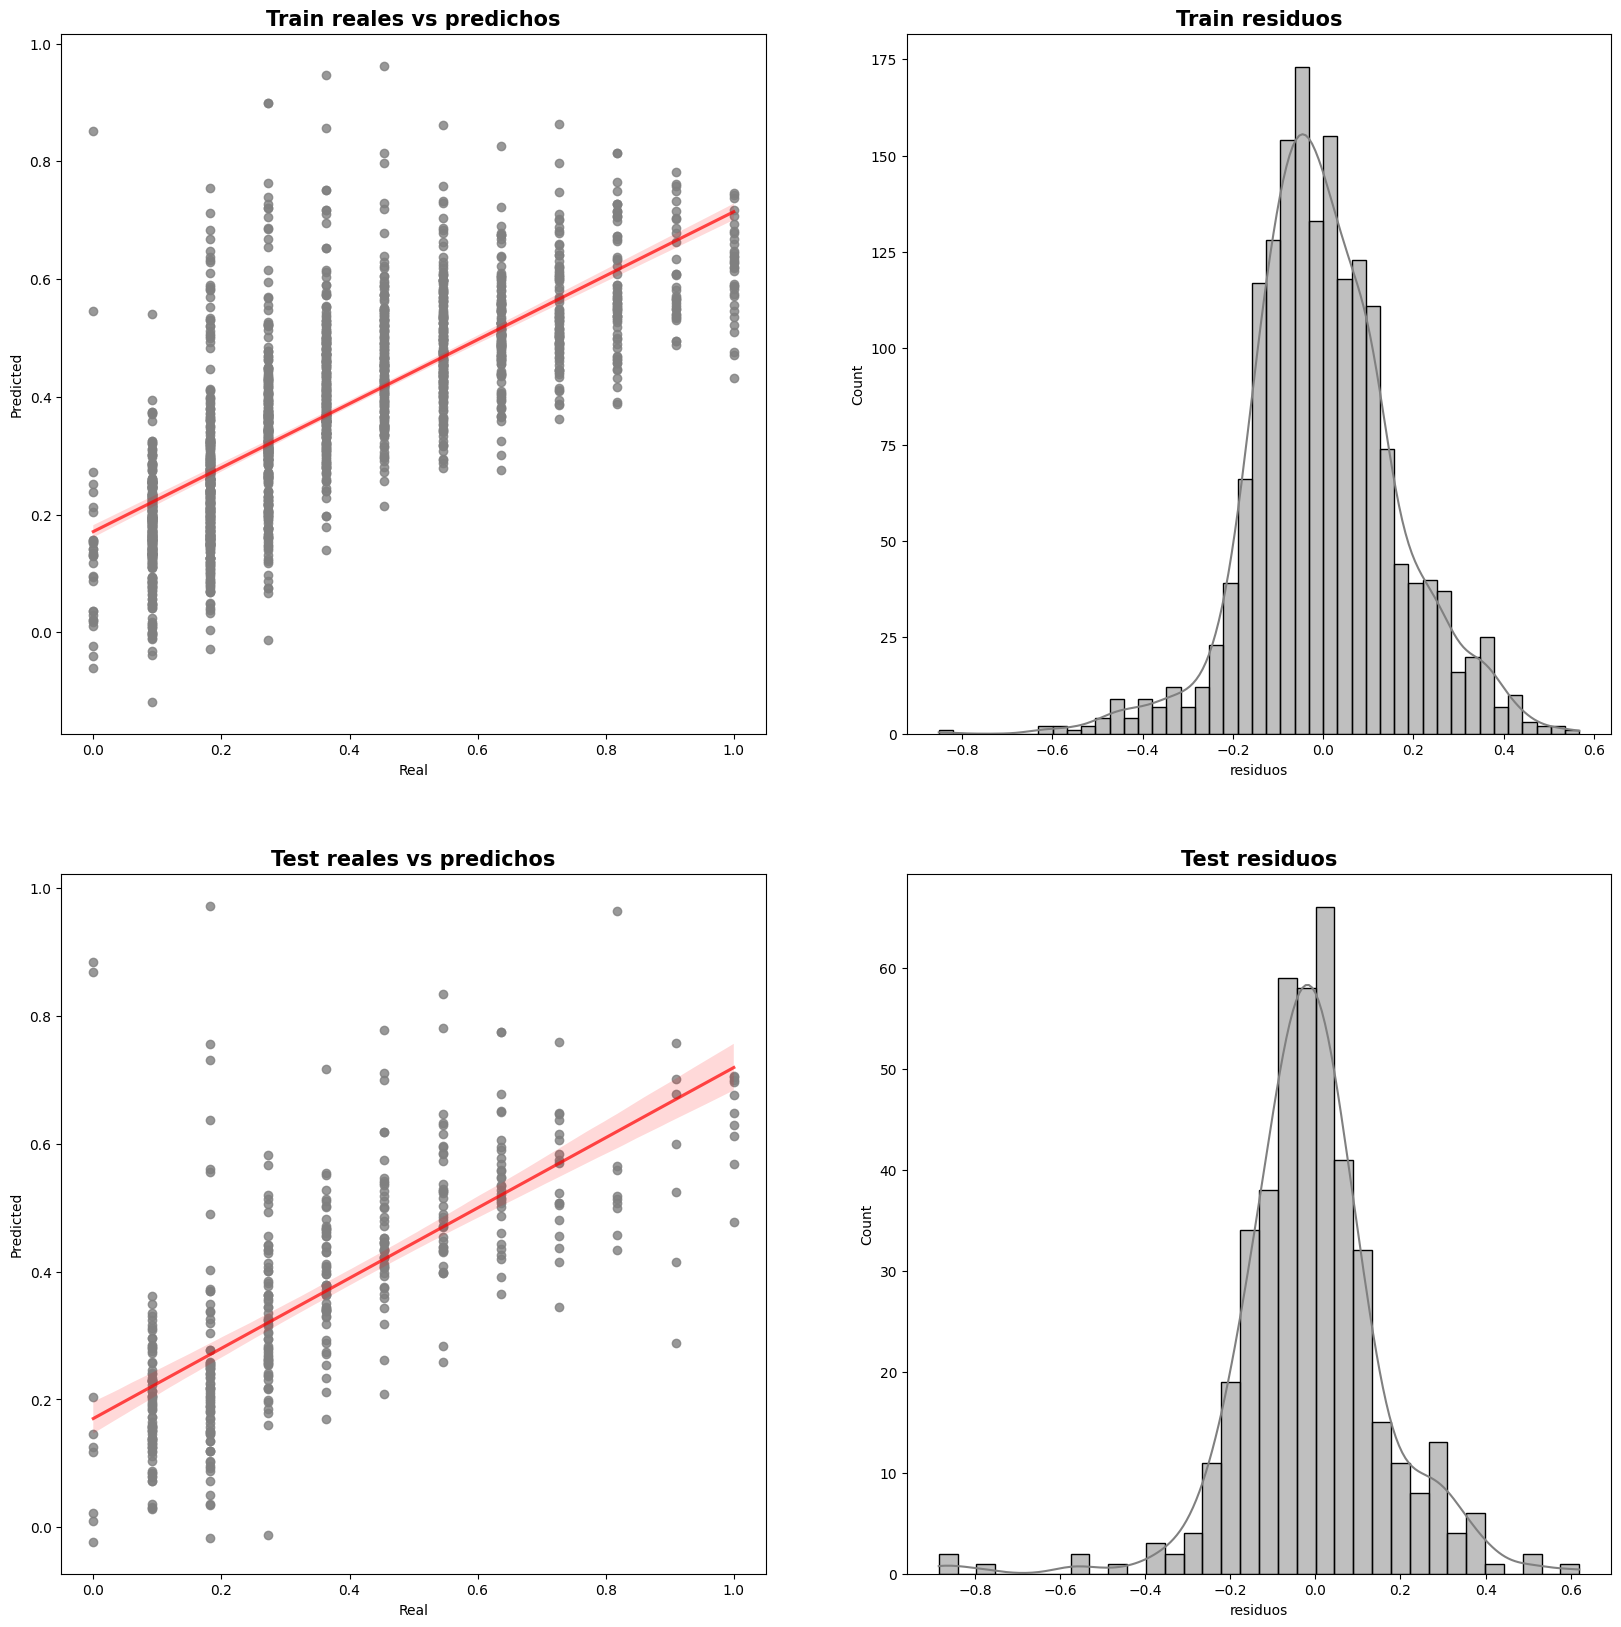

In [16]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

Calculéis las métricas para vuestro modelo

In [18]:
resultados_metricas = {'MAE': [mean_absolute_error(y_test, y_predict_test), mean_absolute_error(y_train, y_predict_train)],
                'MSE': [mean_squared_error(y_test, y_predict_test), mean_squared_error(y_train, y_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_predict_test)), np.sqrt(mean_squared_error(y_train, y_predict_train))],
                'R2':  [r2_score(y_test, y_predict_test), r2_score(y_train, y_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion", "LinearRegression"]}

df_resultados = pd.DataFrame(resultados_metricas)

df_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,0.117877,0.028165,0.167825,0.494634,test,Linear Regresion
1,0.122189,0.026079,0.161489,0.543177,train,LinearRegression


Discutid los resultados de las métricas y extraed conclusiones

Viendos los resultados de nuestras métricas en el modelo de regresión lineal observamos que MAE en train es infimamente mayor que MAE en test. Tanto MSE como RMSE en train y test son practicamente iguales, siendo el train de R2 mínimamente superior a su test.

Con estos datos concluimos que no tenemos overfitting ni underfitting ya que nuestros valores no presentan grandes oscilaciones entre train y test. En el caso del RMSE al tener nuestra variable respuesta en una escala de 0-1 (normalizada), nuestro RMSE tiene un margen de error de un 16%. En cuanto al R2 consideramos que tiene un margen de error muy amplio ya que tiene un 46% de probabilidades de no acertar con precisión a la variación de las compras online.

Guardad los resultados de las métricas en un csv para usarlo más adelante.

In [21]:
df_resultados.to_csv("supermercado_metricas.csv")

### Conclusión Personal

Una vez terminado el estudio y analizadas las conclusiones, de manera personal, lógica y subjetiva, consideramos que el estudio hubiera sido más fructifero si hubiéramos trabajado algunas variables de otra manera y los datos de otras variables predictoras se nos hubieran proporcionado de otra manera. 

Consideramos que deberíamos haber estudiado la compra de productos dividiendo estos en dos grandes grupos (perecederos y no perecederos), ya que probablemente (y sin ningún tipo de base científica, solo de manera lógica) sea mayor la compra online de productos no perecederos o de fecha de caducidad mas larga (papel de cocina, agua, leche...). Siendo los productos frescos de preferencia de compra física.

Con respecto al año de nacimiento, lo volveríamos a seleccionar, siempre y cuando los resultados que nos dieran respondiesen a una lógica (no como en nuestro caso que nos salía que a más edad más compras online).

El número de hijos nos parece un dato importante, ya que aumenta el número de personas en el hogar y el volumen de compra, pero una vez que empezamos el estudio a través del EDA, observamos que tanto kidhome y teenhome no aportaban la información que esperábamos de ellos, es decir, no afectaba en relación a la compras online.

---

df_limpio.drop(["Kidhome","Teenhome","Recency","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","Response","Complain","NumCatalogPurchases","MntGoldProds"], axis=1, inplace=True)

---

Información de las columnas de nuestro Dataframe Original en relación a la conclusión personal:

.- Id = número de cliente.

.- Year_Birth = año de nacimiento del cliente.

.- Education = nivel de estudios del cliente.

.- Marital_Status = estado civil del cliente.

.- Income = ingresos anuales del cliente.

.- Kidhome = presencia de niños en casa.

.- Teenhome = presencia de adolescentes en casa.

.- Dt_Customer = fecha de compra.

.- Recency = frecuencia de compra.

.- MntWines	= cantidad de vinos en compra.

.- MntFruits = cantidad de frutas en compra.

.- MntMeatProducts = cantidad de carnes en compra.

.- MntFishProducts = cantidad de pescados en compra.

.- MntSweetProducts = cantidad de dulces en compra.

.- MntGoldProds = cantidad de alta gama en compra.

.- NumDealsPurchases = número de ofertas.

.- NumWebPurchases = número de compras en web.

.- NumCatalogPurchases = número de compras por catálogo

.- NumStorePurchases = número de compras en tienda física.

.- NumWebVisitsMonth = número de visitas por mes en web.

.- Response	= respuestas en compras.

.- Complain = quejas en compras.

Happy coding💪🏽